In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd

In [93]:
# database available at:  https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs_1.3/twilight_neo/
conn = sqlite3.connect('twilight_neo_v1.3_10yrs.db')
#conn = sqlite3.connect('../baseline/baseline_v1.3_10yrs.db')
df = pd.read_sql('select altitude,sunAlt,visitExposureTime,night,filter,slewTime, observationStartMJD, observationId from SummaryAllProps where note="twilight_neo" and night=20;', conn)
#df = pd.read_sql('select altitude,sunAlt,visitExposureTime,night,filter,slewTime, observationStartMJD from SummaryAllProps where note="greedy";', conn)

conn.close()

In [94]:
print('exposure times (s) = ', np.unique(df['visitExposureTime']))
print('median altitude of twilight observations=', np.median(df['altitude']))

exposure times (s) =  [ 1.]
median altitude of twilight observations= 33.6906953006


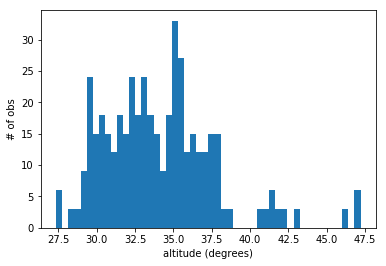

In [95]:
ack = plt.hist(df['altitude'], bins=50)
plt.xlabel('altitude (degrees)')
plt.ylabel('# of obs')

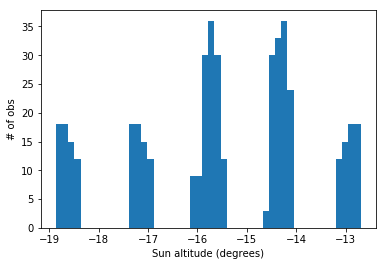

In [96]:
ack = plt.hist(df['sunAlt'], bins=50)
plt.xlabel('Sun altitude (degrees)')
plt.ylabel('# of obs')

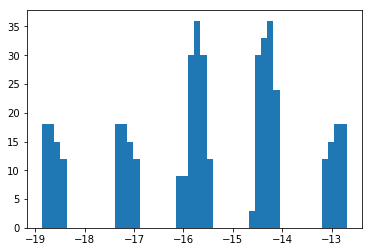

In [97]:
good=np.where(df['night'] < 60)
ack = plt.hist(df['sunAlt'].values[good], bins=50)

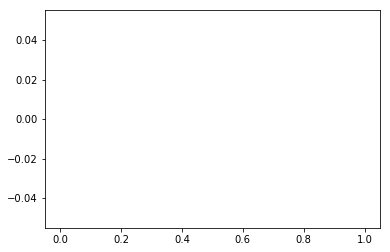

In [98]:
good=np.where((df['night'] > 200) & (df['night'] < 260))
ack = plt.hist(df['sunAlt'].values[good], bins=50)

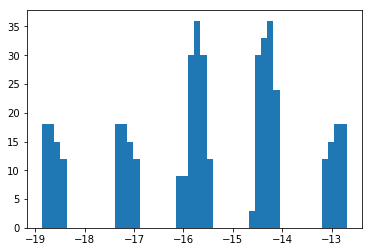

In [99]:
good=np.where((df['night'] == 20 ) )#& (df['observationStartMJD'] < 59873.36401156))
ack = plt.hist(df['sunAlt'].values[good], bins=50)

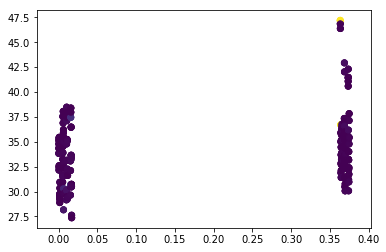

In [79]:
plt.scatter(df['observationStartMJD'].values[good]-df['observationStartMJD'].values[good].min(),
         df['altitude'].values[good], c=df['slewTime'].values[good])
#plt.xlim([0,0.05])

In [80]:
(df['observationStartMJD'].values[good] - np.roll(df['observationStartMJD'].values[good], 1))*24*3600.

array([ -3.23991953e+04,   6.38154417e+00,   6.39007171e+00,
         6.39613308e+00,   6.83021718e+00,   6.37545576e+00,
         6.37722665e+00,   6.75671878e+00,   6.40003884e+00,
         6.39892551e+00,   6.39599792e+00,   6.39162445e+00,
         6.77071363e+00,   6.37033107e+00,   6.78515292e+00,
         6.35783491e+00,   6.35817060e+00,   6.35699378e+00,
         6.35392349e+00,   6.74524542e+00,   6.35288309e+00,
        -1.29545203e+02,   6.38154417e+00,   6.39007171e+00,
         6.39613308e+00,   6.83021718e+00,   6.37545576e+00,
         6.37722665e+00,   6.75671878e+00,   6.40003884e+00,
         6.39892551e+00,   6.39599792e+00,   6.39162445e+00,
         6.77071363e+00,   6.37033107e+00,   6.78515292e+00,
         6.35783491e+00,   6.35817060e+00,   6.35699378e+00,
         6.35392349e+00,   6.74524542e+00,   6.35288309e+00,
        -1.29545203e+02,   6.38154417e+00,   6.39007171e+00,
         6.39613308e+00,   6.83021718e+00,   6.37545576e+00,
         6.37722665e+00,

In [49]:
mjds = df['observationStartMJD'].values[good]
mjds = mjds[np.argsort(mjds)]


In [72]:
np.size(mjds)

441

In [73]:
np.size(np.unique(mjds))

147

(0, 50)

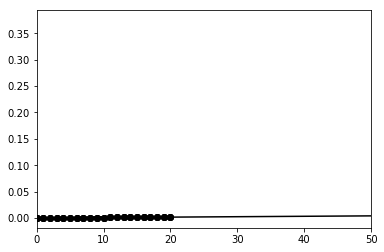

In [88]:
plt.plot(df['observationId'] - df['observationId'].min(),
         df['observationStartMJD']-  df['observationStartMJD'].min(), 'ko-')
plt.xlim([0,50])
#plt.ylim([0,0.005])